In [9]:
import torch
import torch.nn as nn
from torchvision import datasets,transforms
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [10]:
transforms=transforms.ToTensor()
train_data=datasets.FashionMNIST(root='./data',train=True,download=True,transform=transforms)
test_data=datasets.FashionMNIST(root='./data',train=False,download=True,transform=transforms)

train_loader=DataLoader(train_data,batch_size=64,shuffle=True)
test_loader=DataLoader(test_data,batch_size=64,shuffle=True)

In [11]:
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,10))
  def forward(self,x):
    if self.layers is None:
      raise Exception("model not initialized")
    return self.layers(x)


In [12]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [13]:
model=MLP().to(device)

In [14]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [16]:
num_epoch=5
train_losses=[]
train_acc=[]

for epoch in range(num_epoch):
  model.train()
  running_loss=0
  correct = 0
  total=0
  for images,labels in train_loader:
    images,labels=images.to(device),labels.to(device)
    outputs=model(images)

    loss=criterion(outputs,labels)

    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    running_loss +=loss.item()
    _,predicted=torch.max(outputs.data,1)

    total +=labels.size(0)
    correct +=(predicted==labels).sum().item()

  epoch_loss=running_loss/len(train_loader)
  epoch_acc=100*correct/total
  train_losses.append(epoch_loss)
  train_acc.append(epoch_acc)


  print(f"Epoch {epoch+1}/{num_epoch} - Loss : {epoch_loss:.4f} - Accuracy : {epoch_acc:.2f}%")

Epoch 1/5 - Loss : 0.5260 - Accuracy : 80.96%
Epoch 2/5 - Loss : 0.3673 - Accuracy : 86.47%
Epoch 3/5 - Loss : 0.3301 - Accuracy : 87.85%
Epoch 4/5 - Loss : 0.3029 - Accuracy : 88.77%
Epoch 5/5 - Loss : 0.2870 - Accuracy : 89.31%


In [17]:
model.eval()
all_preds=[]
all_labels=[]

with torch.no_grad():
  correct=0
  total=0
  for images,labels in test_loader:
    images,labels=images.to(device),labels.to(device)
    outputs=model(images)
    _,predicted=torch.max(outputs.data,1)
    total +=labels.size(0)
    correct +=(predicted==labels).sum().item()
    all_preds.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())



print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 86.94%


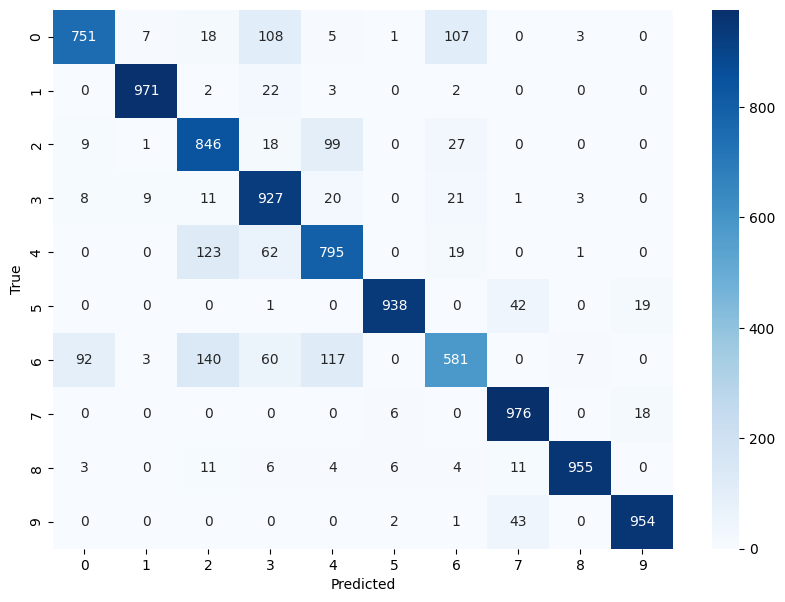

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.74      0.85      0.79      1000
           3       0.77      0.93      0.84      1000
           4       0.76      0.80      0.78      1000
           5       0.98      0.94      0.96      1000
           6       0.76      0.58      0.66      1000
           7       0.91      0.98      0.94      1000
           8       0.99      0.95      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



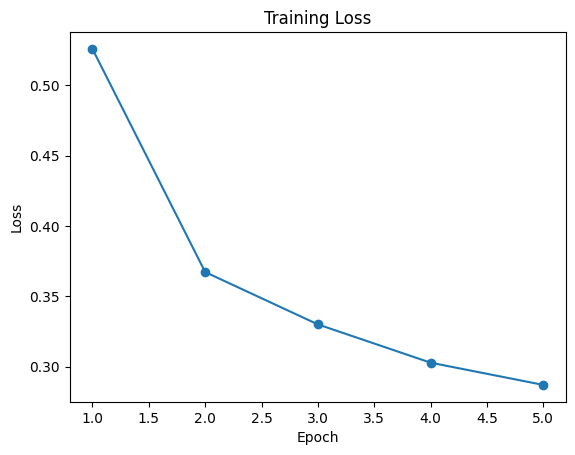

In [19]:

# Step 7: Confusion matrix & classification report
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(all_labels, all_preds))

# Step 8: Plot training curve
plt.plot(range(1, num_epoch+1), train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()